# Quantiying Shakespeare

Downloading the plain text corpus of Shakespeare's works from: <https://bit.ly/shakespeare-txt>

## Plan of Action

1. Read every line of text into a list of strings
2. Count the frequencies of each letter
3. Visualize the frequencies

In [1]:
# Read lines from the file

from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Reading every line from filename into a list of strs."""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        line = line.lower()
        lines.append(line)
    return lines

shakespeare_lines: list[str] = read_lines("./shakespeare.txt")
print(len(shakespeare_lines))

124456


In [8]:
# Tally up the characters of the works
def tally(counter: dict[str, int], found: str) -> None:
    if found in counter:
        counter[found] += 1
    else:
        counter[found] = 1


def alphabetize(a: dict[str, int]) -> None:
    i: int = ord('a')
    while i <= ord('z'):
        a[chr(i)] = 0
        i += 1


def count_letters(lines: list[str]) -> dict[str, int]:
    counts: dict[str, int] = {}
    alphabetize(counts)
    for line in lines:
        for char in line:
            if char >= 'a' and char <= 'z':
                tally(counts, char)
    return counts


shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)

{'a': 244664, 'b': 46543, 'c': 66688, 'd': 133779, 'e': 404621, 'f': 68803, 'g': 57035, 'h': 218406, 'i': 198184, 'j': 2712, 'k': 29212, 'l': 146161, 'm': 95580, 'n': 215924, 'o': 281391, 'p': 46525, 'q': 2404, 'r': 208894, 's': 214978, 't': 289975, 'u': 114818, 'v': 33989, 'w': 72894, 'x': 4688, 'y': 85271, 'z': 1099}


<BarContainer object of 26 artists>

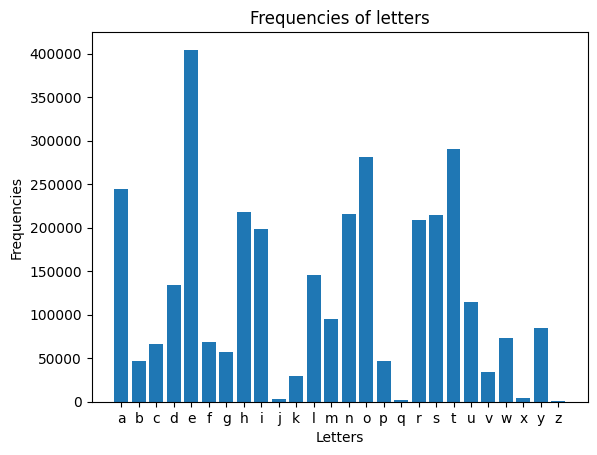

In [9]:
# Plot the results in a bar chart
from matplotlib import pyplot

pyplot.title("Frequencies of letters")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")
labels: list[str] = list(shakespeare_letters.keys())
values: list[int] = list(shakespeare_letters.values())
pyplot.bar(labels, values)